**Done Using Colab**

In [562]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [563]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, power_transform
train , test = pd.read_csv('cleaned_train.csv'), pd.read_csv('cleaned_test.csv')

In [564]:
train.head()

,VehicleID,Maker,Model,Year,Colour,Distance,Abuja,Ibadan,Lagos,Brand New,Foreign Used,Nigerian Used,Scaled_Distance,Log_Distance,box_cos_distance,Amount (Million Naira)
0,VHL12546,17,142,2011,18,94903.339506,1,0,0,0,0,1,-0.071802,11.460614,0.127860,2.2
1,VHL18827,19,1204,2012,18,125000.000000,0,1,0,0,0,1,0.260450,11.736069,0.529591,3.5
2,VHL19499,29,1040,2010,17,110852.000000,0,0,1,0,1,0,0.104263,11.615951,0.349130,9.2
3,VHL17991,34,590,2017,3,30000.000000,1,0,0,0,1,0,-0.788303,10.308953,-1.156289,22.8
4,VHL12170,53,659,2002,17,125206.000000,0,1,0,0,0,1,0.262724,11.737716,0.532124,2.6


In [565]:
y = train.pop('Amount (Million Naira)')
all = pd.concat([train, test],ignore_index = True)

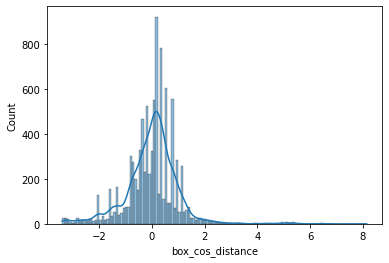

In [566]:
sns.histplot(x = 'box_cos_distance', kde = True, data  = all)

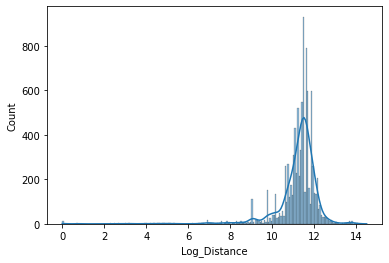

In [567]:
sns.histplot(x = 'Log_Distance', kde = True, data  = all)

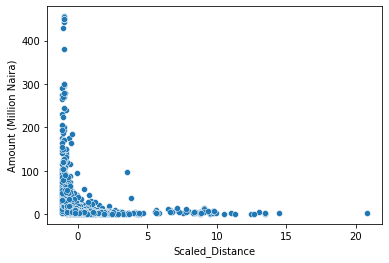

In [568]:
sns.scatterplot(x  ='Scaled_Distance', y = y, data = all )

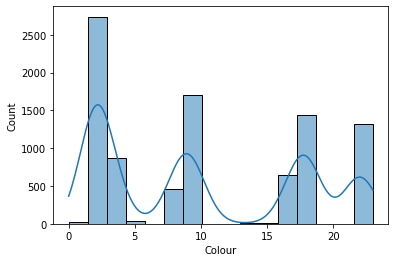

In [569]:

sns.histplot(x = 'Colour', kde = True, data  = all)

In [570]:
all['log_Colour'] = np.log(all['Colour'] + 1)

In [571]:
# def standardize(df,col):
#   df = df.copy()
#   mean  = df[col].mean()
#   std = df[col].std()
#   z_score= (df[col] - mean)/ std
#   return df

In [572]:
train.shape, test.shape

((7205, 15), (2061, 15))

In [574]:
all = all.drop(columns = ['Colour', 'Distance','Log_Distance','box_cos_distance'])

In [575]:
for col in all.columns[1:]:
  all[col] = (all[col] - all[col].mean())/all[col].std()


In [576]:
train,test = all.iloc[:7205], all.iloc[7205:]

In [577]:
X = train.drop(columns  = ['VehicleID'])

# y = train['Amount (Million Naira)']

In [578]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [579]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
xgb = XGBRegressor(random_state = 0,objective ='reg:squarederror',learning_rate = .2, max_depth = 3, min_child_weight = 3)



xgb.fit(X_train,y_train)
xgb_preds = xgb.predict(X_test)
mean_squared_error(y_test,xgb_preds,squared=False)

9.40348591266681

In [ ]:
import matplotlib.pyplot as plt
sort = xgb.feature_importances_.argsort()
plt.barh(X.columns[sort], xgb.feature_importances_[sort])
plt.xlabel("Feature Importance")


In [ ]:
 
 
# sub_file = pd.DataFrame({
#       'VehicleID': test['VehicleID'],
#       'Amount (Million Naira)': xgb.predict(test.drop(columns = ['VehicleID']))
#   })

# sub_file.to_csv('scaled.csv', index = False)

In [ ]:
# XGBRegressor(learning_rate = .2, max_depth = 3, min_child_weight = 2)

In [ ]:

# import optuna, joblib
# from sklearn.model_selection import cross_val_score

# from optuna import Trial, visualization
# from optuna.samplers import TPESampler
# def objective(trial: Trial,X,y) -> float:
    
#     joblib.dump(study, 'study.pkl')

#     param = {
#                 # "n_estimators" : trial.suggest_int('n_estimators', 50, 200),
#                 'max_depth':trial.suggest_int('max_depth', 2, 25),
#                 'reg_alpha':trial.suggest_int('reg_alpha', 0, 5),
#                 'reg_lambda':trial.suggest_int('reg_lambda', 0, 5),
#                 'min_child_weight':trial.suggest_int('min_child_weight', 0, 5),
#                 'gamma':trial.suggest_int('gamma', 0, 5),
#                 'learning_rate':trial.suggest_loguniform('learning_rate',0.005,0.5),
#                 'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree',0.1,1,0.01),
#                 'nthread' : -1
#             }
    
#     model = XGBRegressor(objective = 'reg:squarederror',**param)
    
#     return cross_val_score(model, X, y, cv=3).mean()

# study = optuna.create_study(direction='minimize',sampler=TPESampler())
# study.optimize(lambda trial : objective(trial,X,y),n_trials= 50)

# print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))